## Heatmap

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
conn = sqlite3.connect("../ex00/data/checking-logs.sqlite")

In [3]:
query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
df = pd.read_sql_query(query, conn)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['weekday'].map({
    'Monday': 'Mon',
    'Tuesday': 'Tue',
    'Wednesday': 'Wed',
    'Thursday': 'Thu',
    'Friday': 'Fri',
    'Saturday': 'Sat',
    'Sunday': 'Sun'
})
df

,uid,timestamp,weekday,hour
0,user_4,2020-04-17 05:19:02.744528,Fri,5
1,user_4,2020-04-17 05:22:35.249331,Fri,5
2,user_4,2020-04-17 05:22:45.549397,Fri,5
3,user_4,2020-04-17 05:34:14.691200,Fri,5
4,user_4,2020-04-17 05:34:24.422370,Fri,5
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,Thu,20
3203,user_1,2020-05-21 20:22:41.785725,Thu,20
3204,user_1,2020-05-21 20:22:41.877806,Thu,20
3205,user_1,2020-05-21 20:37:00.129678,Thu,20


In [4]:
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_data = df.groupby(['uid', 'weekday']).size().unstack(fill_value=0)
weekday_data = weekday_data[weekday_order]
weekday_data = weekday_data.loc[weekday_data.sum(axis=1).sort_values(ascending=False).index]
weekday_data = weekday_data.T
weekday_data = weekday_data.loc[weekday_order[::-1]]
weekday_data 

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Sun,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,8,0,1,0,0
Sat,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,0,2,6,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,0,3,0,0,0
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,0,5,3,0,0
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,0,2,0,3


In [5]:
hour_data = df.groupby(['uid', 'hour']).size().unstack(fill_value=0)
hour_data = hour_data.loc[hour_data.sum(axis=1).sort_values(ascending=False).index]
hour_data = hour_data.T
hour_data = hour_data.reindex(range(24), fill_value=0)
hour_data = hour_data.sort_index(ascending=False)
hour_data

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
23,4,12,15,0,0,8,0,0,0,0,...,0,0,0,0,2,1,3,0,0,0
22,6,21,2,26,2,4,16,0,2,0,...,0,8,0,0,0,0,0,0,0,0
21,86,33,24,43,4,22,4,8,24,5,...,2,12,5,2,2,7,0,2,0,0
20,53,25,16,20,25,6,11,1,25,6,...,0,21,8,13,0,0,0,0,0,0
19,29,25,5,27,11,0,7,8,29,24,...,1,4,17,6,1,0,0,0,0,0
18,11,28,2,29,4,9,8,28,6,29,...,2,0,3,4,0,0,0,0,0,0
17,19,40,8,3,12,0,37,2,12,20,...,1,0,0,1,0,0,0,0,0,3
16,40,12,4,6,18,14,43,2,16,12,...,4,0,0,0,1,0,0,1,0,0
15,12,25,8,10,31,20,25,2,0,14,...,7,7,8,1,2,0,0,0,0,0


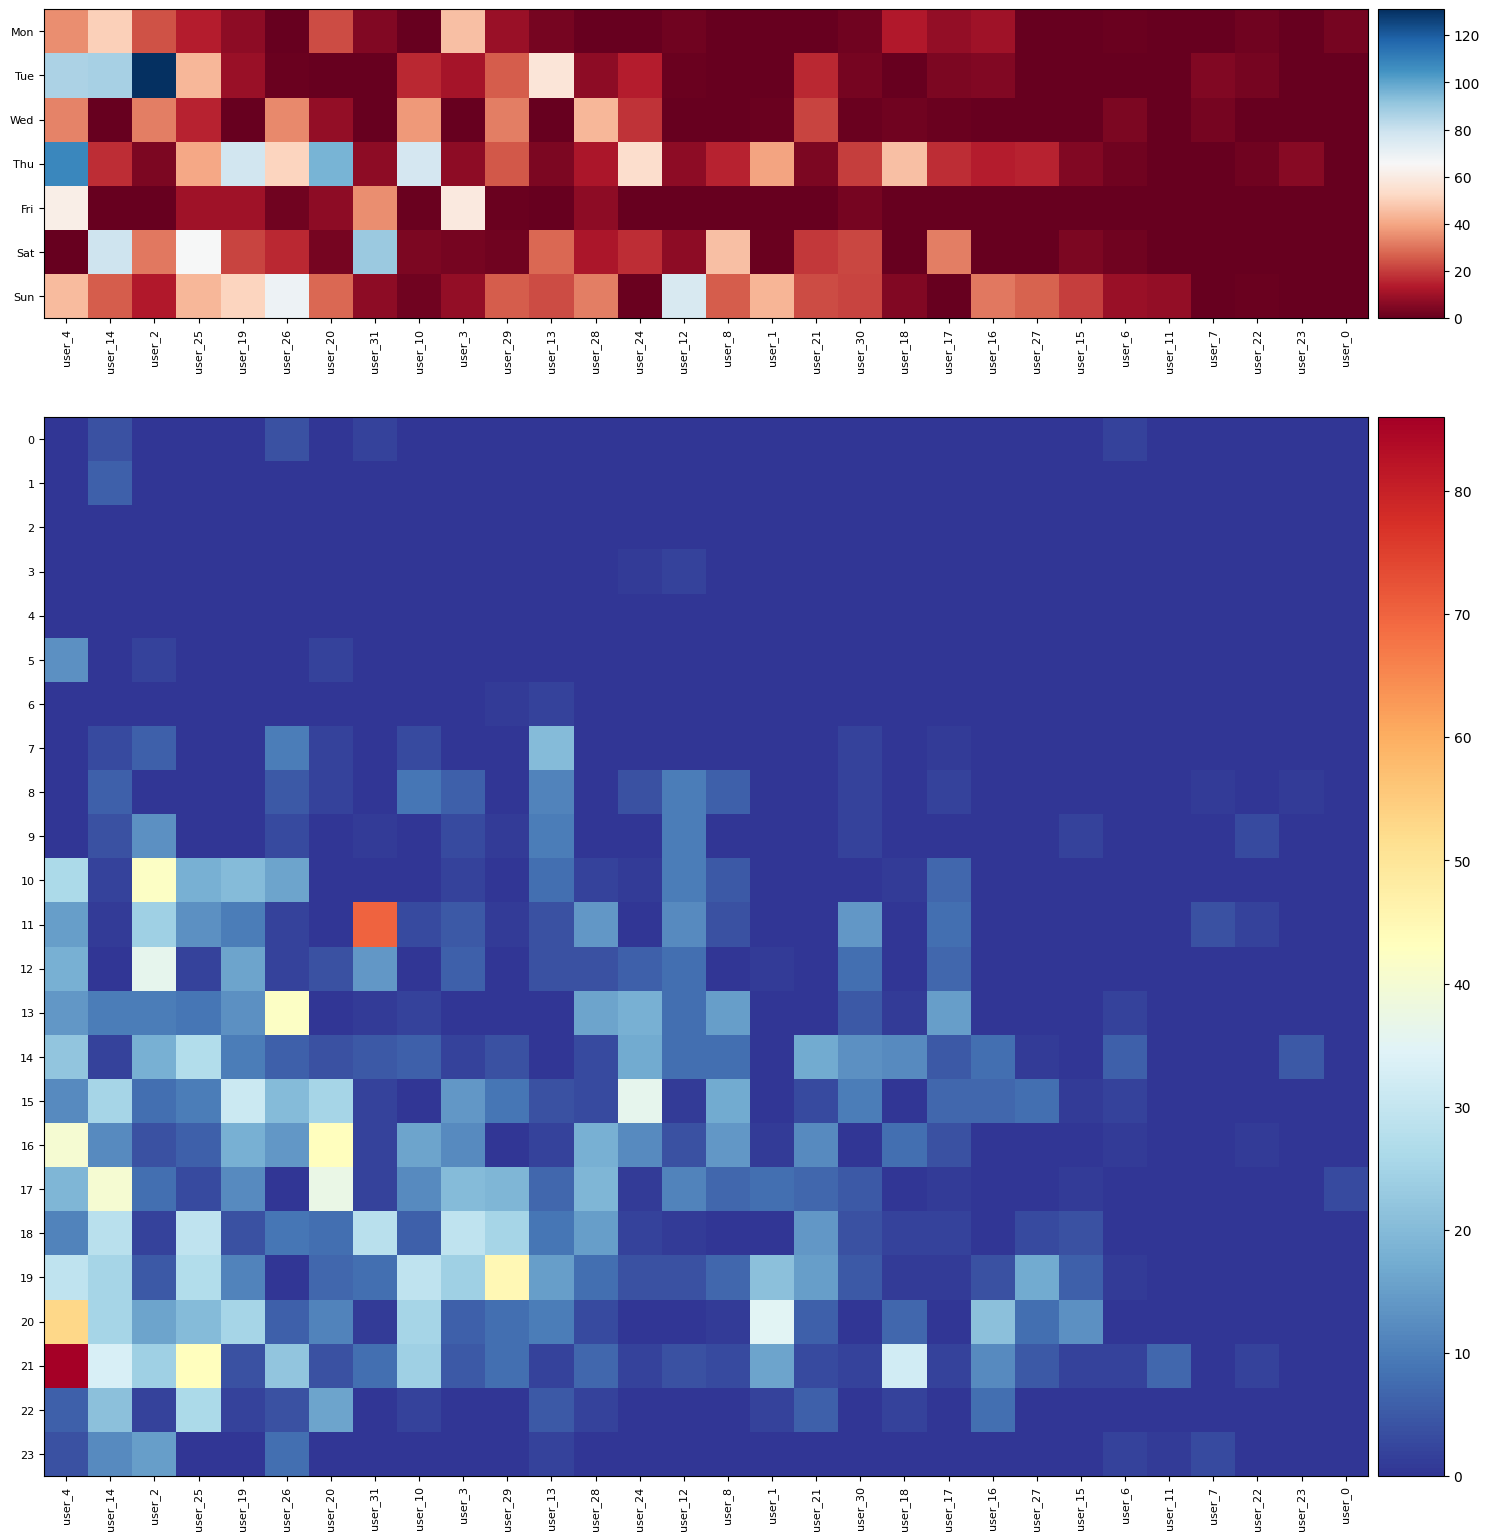

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 17), gridspec_kw={'height_ratios': [1, 2]})

im1 = ax1.pcolormesh(weekday_data.values, cmap='RdBu')
ax1.set_xticks([i + 0.5 for i in range(weekday_data.shape[1])])
ax1.set_xticklabels(weekday_data.columns, rotation=90, fontsize=8)
ax1.set_yticks([i + 0.5 for i in range(weekday_data.shape[0])])
ax1.set_yticklabels(list(weekday_data.index), fontsize=8)
ax1.set_aspect('equal')
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax1)
plt.tight_layout()

im2 = ax2.pcolormesh(hour_data, cmap='RdYlBu_r') # Spectral_r
ax2.set_xticks([i + 0.5 for i in range(hour_data.shape[1])])
ax2.set_xticklabels(hour_data.columns, rotation=90, fontsize=8)
ax2.set_yticks([i + 0.5 for i in range(hour_data.shape[0])])
ax2.set_yticklabels(hour_data.index, fontsize=8)
ax2.set_aspect('equal')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax2)

plt.tight_layout()

### Connection closed

In [7]:
conn.close()

### Answer the questions

In [8]:
weekday_totals = weekday_data.sum(axis=1)
min_commits_day = weekday_totals.idxmin()
print(min_commits_day)

Fri


- **Which user has the most commits on Tue?** - `user_2`
- **Which user has the most commits on Thu?** - `user_4`
- **On which weekday do the users not like making a lot of commits?** - `Fri`
- **Which user at which hour made the largest number of commits?** - `user_4, 21`